Seven CTD casts were taken over a cross-shelf transect that includes WE, CN, and EA site centers on 18 Apr 2024. Measurements from six of those casts (008-013) are available from the PRTSZ that was mounted horizontally on the bottom of the CTD rosette. In this notebook we compare profiles of particle concentration from the PRTSZ to beam transmission on the CTD-mounted transmissometer.

In [1]:
# Import libraries used in this notebook
import os
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

#### Import PRTSZ data for plotting

In [2]:
# Define path to locally saved PRTSZ data from CN site
# _rs at end of data file name indicates PSD computed assuming randomly shaped particles
prtsz_file = "AR82b_cast009_CN_rs.csv"
prtsz_path = os.path.join(os.path.expanduser(
    "~/Desktop/pioneer-20_data/PRTSZ_on_rosette/AR82b_CTDsurvey_processed_data/"),
    prtsz_file)

In [6]:
# Import csv file using pandas and define variables
prtsz_data = pd.read_csv(prtsz_path, header=None)
total_vol_concentration = prtsz_data[50]
year = prtsz_data[42]
month = prtsz_data[43]
day = prtsz_data[44]
hour = prtsz_data[45]
minute = prtsz_data[46]
second = prtsz_data[47]

In [9]:
# Convert time data frames to datetime vector
dt_df = pd.DataFrame({"year": year, "month": month,
                      "day": day, "hour": hour,
                      "minute": minute, "second": second})
prtsz_dt = pd.to_datetime(dt_df,
                          yearfirst=True, utc=True)
prtsz_dt

0     2024-04-18 13:39:53+00:00
1     2024-04-18 13:39:55+00:00
2     2024-04-18 13:39:57+00:00
3     2024-04-18 13:39:59+00:00
4     2024-04-18 13:40:01+00:00
                 ...           
396   2024-04-18 13:53:05+00:00
397   2024-04-18 13:53:07+00:00
398   2024-04-18 13:53:09+00:00
399   2024-04-18 13:53:11+00:00
400   2024-04-18 13:53:13+00:00
Length: 401, dtype: datetime64[ns, UTC]

In [13]:
# Create data array of total volume concentration with series
vol_con = xr.DataArray(data=total_vol_concentration,
                       coords={"time": prtsz_dt},
                       name="total_volume_concentration")

In [32]:
# Write function to load PRTSZ total volume concentration from file name
def load_prtsz_volume_concentration(prtsz_file):
    """ Import PRTSZ data from CSV, use date and time
    columns to create Pandas datetime Index, and define
    Xarray Data Array object containing total volume
    concentration time series.
    Author: Kylene Cooley, 19 Apr 2024
    Inputs:
    -------
    prtsz_file, str of file name in local PRTSZ along shelf CTD 
        survey data directory
    Returns:
    --------
    vol_con, Data Array of total volume concentration from PRTSZ
        dataset with 1 dim = "time"
    """
    # Define path to locally saved PRTSZ data from CN site
    prtsz_path = os.path.join(os.path.expanduser(
    "~/Desktop/pioneer-20_data/PRTSZ_on_rosette/AR82b_CTDsurvey_processed_data/"),
    prtsz_file)
    # Import csv file using pandas and define variables
    prtsz_data = pd.read_csv(prtsz_path, header=None)
    total_vol_concentration = prtsz_data[50]
    year = prtsz_data[42]
    month = prtsz_data[43]
    day = prtsz_data[44]
    hour = prtsz_data[45]
    minute = prtsz_data[46]
    second = prtsz_data[47]
    # Convert time parameter series to datetime vector
    dt_df = pd.DataFrame({"year": year, "month": month,
                        "day": day, "hour": hour,
                        "minute": minute, "second": second})
    prtsz_dt = pd.to_datetime(dt_df,
                            yearfirst=True, utc=True)
    # Create data array of total volume concentration with series
    vol_con = xr.DataArray(data=total_vol_concentration.astype(float),
                            coords={"time": prtsz_dt},
                            name="total_volume_concentration")
    return vol_con

#### Import transmissometer data for plotting

In [14]:
# Define path to locally saved cast data from CN site
cast_file = "ar82b_009.asc"
cast_path = os.path.join(os.path.expanduser(
    "~/Desktop/pioneer-20_data/CTD_casts/"),
    cast_file)

In [21]:
# Import cast data
cast_data = pd.read_csv(cast_path, sep="\s+", header=None,
                         usecols=[0, 2, 4, 5, 8, 9, 11, 12, 13, 14],
                         encoding="ascii", encoding_errors="replace")
# cast_data 


,0,2,4,5,8,9,11,12,13,14
0,TimeQ,DepSM,T090C,T190C,Sal00,Sal11,FlECO-AFL,CStarTr0,CStarAt0TurbWETntu0,Par
1,766763150,3.971,13.9753,13.9658,29.7246,29.7299,0.9213,82.1190,0.7880,0.7977
2,766763170,4.963,14.0301,14.0174,29.7205,29.7176,0.8603,81.9571,0.7959,0.8827
3,766763173,5.956,14.0714,14.0551,29.6909,29.6990,0.8777,81.9299,0.7972,0.7688
4,766763174,6.949,13.7658,13.7013,29.8036,29.8406,0.9264,81.9413,0.7967,0.8477
5,766763176,7.941,13.7003,13.7043,29.8310,29.8334,1.0036,82.4412,0.7724,0.8686
6,766763179,8.934,13.5962,13.5548,29.8751,29.8933,1.1195,82.8619,0.7520,0.8241
7,766763180,9.927,13.2521,13.1067,29.9842,30.0488,1.1084,82.9594,0.7473,0.8243
8,766763182,10.919,11.8111,11.7986,30.5657,30.5674,1.4174,83.5472,0.7190,0.7801
9,766763183,11.912,10.2860,10.2982,31.8512,31.8495,2.3062,85.0155,0.6494,0.7139


In [23]:

# Clean up the CTD cast data by dropping the first row, adding the correct column names, 
# converting time to an actual value, and then set time as the index
cast_data = cast_data.drop(index=0)
cast_data.rename(columns={0: "time",
                    2: "depth",
                    4: "temperature1",
                    5: "temperature2",
                    8: "salinity1",
                    9: "salinity2",
                    11: "fluorescence",
                    12: "beam transmission",
                    13: "beam attenuation",
                    14: "turbidity"
                }, inplace=True)

In [24]:
# Convert "time" to a datetime object and set as index
cast_data.set_index(pd.to_datetime(cast_data.time.astype(float), utc=True, unit="s", origin="2000-01-01T00:00:00"), inplace=True)
cast_data.drop("time", axis=1, inplace=True)
cast_data

,depth,temperature1,temperature2,salinity1,salinity2,fluorescence,beam transmission,beam attenuation,turbidity
time,,,,,,,,,
2024-04-18 13:45:50+00:00,3.971,13.9753,13.9658,29.7246,29.7299,0.9213,82.1190,0.7880,0.7977
2024-04-18 13:46:10+00:00,4.963,14.0301,14.0174,29.7205,29.7176,0.8603,81.9571,0.7959,0.8827
2024-04-18 13:46:13+00:00,5.956,14.0714,14.0551,29.6909,29.6990,0.8777,81.9299,0.7972,0.7688
2024-04-18 13:46:14+00:00,6.949,13.7658,13.7013,29.8036,29.8406,0.9264,81.9413,0.7967,0.8477
2024-04-18 13:46:16+00:00,7.941,13.7003,13.7043,29.8310,29.8334,1.0036,82.4412,0.7724,0.8686
2024-04-18 13:46:19+00:00,8.934,13.5962,13.5548,29.8751,29.8933,1.1195,82.8619,0.7520,0.8241
2024-04-18 13:46:20+00:00,9.927,13.2521,13.1067,29.9842,30.0488,1.1084,82.9594,0.7473,0.8243
2024-04-18 13:46:22+00:00,10.919,11.8111,11.7986,30.5657,30.5674,1.4174,83.5472,0.7190,0.7801
2024-04-18 13:46:23+00:00,11.912,10.2860,10.2982,31.8512,31.8495,2.3062,85.0155,0.6494,0.7139


In [25]:
# Convert data frame to an xarray dataset
cast = xr.Dataset(cast_data)
cast = cast.astype(float)
cast = cast.assign_coords({"time": cast_data.index.values})
cast

<xarray.Dataset>
Dimensions:            (time: 52)
Coordinates:
  * time               (time) datetime64[ns] 2024-04-18T13:45:50 ... 2024-04-...
Data variables:
    depth              (time) float64 3.971 4.963 5.956 ... 4.963 3.971 2.978
    temperature1       (time) float64 13.98 14.03 14.07 ... 13.61 13.83 13.79
    temperature2       (time) float64 13.97 14.02 14.06 ... 13.62 13.71 13.88
    salinity1          (time) float64 29.72 29.72 29.69 ... 29.84 29.76 29.8
    salinity2          (time) float64 29.73 29.72 29.7 ... 29.85 29.82 29.76
    fluorescence       (time) float64 0.9213 0.8603 0.8777 ... 1.22 1.016 0.9467
    beam transmission  (time) float64 82.12 81.96 81.93 ... 83.06 82.32 82.26
    beam attenuation   (time) float64 0.788 0.7959 0.7972 ... 0.7782 0.781
    turbidity          (time) float64 0.7977 0.8827 0.7688 ... 0.7465 0.7532

In [27]:
# Create data arrays for beam transmission and depth
beam_transmission = cast["beam transmission"]
depth = cast["depth"]

In [3]:
# Define function to load beam transmission data from CTD cast ASCII files
def load_ctd_beam_transmission(cast_file):
    """ Load beam transmission from CTD cast ASCII file
    Inputs:
    -------
    cast_file, str file name of ASCII file containing
        CTD cast data
    Returns:
    --------
    beam_transmission, DataArray containing beam transmission
        time series from CTD-mounted transmissometer.
    depth, DataArray containing depth calculated from
        pressure as measured on CTD.
    Author: Kylene Cooley, 19 Apr 2024
    """
    # Define path to locally saved cast data
    cast_path = os.path.join(os.path.expanduser(
        "~/Desktop/pioneer-20_data/CTD_casts/"),
        cast_file)
    # Import cast data
    cast_data = pd.read_csv(cast_path, sep="\s+", header=None,
                            usecols=[0, 2, 4, 5, 8, 9, 11, 12, 13, 14],
                            encoding="ascii", encoding_errors="replace")
    # Clean up the CTD cast data by dropping the first row,
    # adding the correct column names, converting time to
    # an actual value, and then set time as the index
    cast_data = cast_data.drop(index=0)
    cast_data.rename(columns={0: "time",
                        2: "depth",
                        4: "temperature1",
                        5: "temperature2",
                        8: "salinity1",
                        9: "salinity2",
                        11: "fluorescence",
                        12: "beam transmission",
                        13: "beam attenuation",
                        14: "turbidity"
                    }, inplace=True)
    cast_data.set_index(pd.to_datetime(cast_data.time.astype(float),
                                       utc=True, unit="s",
                                       origin="2000-01-01T00:00:00"),
                                       inplace=True)
    cast_data.drop("time", axis=1, inplace=True)
    # Convert data frame to an xarray dataset
    cast = xr.Dataset(cast_data)
    cast = cast.astype(float)
    cast = cast.assign_coords({"time": cast_data.index.values})
    # Create data arrays for beam transmission and depth
    beam_transmission = cast["beam transmission"]
    depth = cast["depth"]
    return cast, beam_transmission, depth

#### Check data coordinates for each parameter

In [28]:
vol_con

<xarray.DataArray 'total_volume_concentration' (time: 401)>
array([2.17476200e+02, 2.22044500e+02, 2.22745300e+02, 2.23496600e+02,
       2.22935800e+02, 2.26470200e+02, 2.20132800e+02, 2.20079500e+02,
       2.23292700e+02, 2.24153600e+02, 2.18266100e+02, 2.13885400e+02,
       2.09598500e+02, 2.07794200e+02, 2.04803900e+02, 2.03263900e+02,
       2.01719800e+02, 2.00451700e+02, 2.00362000e+02, 1.92110300e+02,
       1.94004400e+02, 1.96430900e+02, 1.95149500e+02, 1.96463600e+02,
       1.97343800e+02, 1.96861700e+02, 1.96067500e+02, 1.93474800e+02,
       1.96849700e+02, 1.97418300e+02, 1.98439900e+02, 1.94247700e+02,
       1.95317400e+02, 1.94146600e+02, 1.95913600e+02, 1.91183100e+02,
       1.91145700e+02, 1.92362300e+02, 1.89940100e+02, 1.86788000e+02,
       1.87388100e+02, 1.82186400e+02, 1.84530400e+02, 1.82558400e+02,
       1.83897400e+02, 1.80460400e+02, 1.84091900e+02, 1.84894400e+02,
       1.85602700e+02, 1.85993600e+02, 1.85914400e+02, 1.90966200e+02,
       1.91000400e+02, 1.89745000e+02, 1.84051900e+02, 1.83060700e+02,
       1.84217400e+02, 1.84678600e+02, 1.81911000e+02, 1.80843300e+02,
       1.81380400e+02, 1.78835900e+02, 1.78123800e+02, 1.75556000e+02,
       1.73847200e+02, 1.72638000e+02, 1.72865700e+02, 1.73154200e+02,
       1.71874700e+02, 1.73791000e+02, 1.74744900e+02, 1.77114900e+02,
       1.75711200e+02, 1.79927300e+02, 1.80685100e+02, 1.81470000e+02,
       1.42885900e+02, 1.78111300e+02, 1.77782300e+02, 1.72573600e+02,
...
       1.19013730e+03, 1.20161360e+03, 1.40541580e+03, 1.40966490e+03,
       1.58364700e+03, 1.79808010e+03, 1.77657750e+03, 2.19202590e+03,
       1.88094590e+03, 2.10118060e+03, 2.27661900e+03, 2.04420790e+03,
       2.12068490e+03, 2.44014160e+03, 2.47346110e+03, 2.59558500e+03,
       2.86736140e+03, 3.17021850e+03, 3.13354210e+03, 3.25968880e+03,
       3.50831430e+03, 3.22102450e+03, 3.87346620e+03, 4.17468160e+03,
       3.98106780e+03, 4.23545800e+03, 4.06253570e+03, 4.16824600e+03,
       3.90858100e+03, 4.24591430e+03, 4.34872550e+03, 6.30252260e+03,
       5.19161920e+03, 4.21968220e+03, 4.75148850e+03, 4.05718000e+03,
       5.29655520e+03, 3.59258630e+03, 3.88264720e+03, 4.49069470e+03,
       3.75566450e+03, 4.02388480e+03, 3.83329230e+03, 4.04950050e+03,
       4.01759830e+03, 5.93073180e+03, 4.11309290e+03, 4.11012600e+03,
       5.50761350e+03, 4.01312930e+03, 3.99645060e+03, 3.95832130e+03,
       5.66395360e+03, 4.53716230e+03, 3.58868000e+03, 4.00845340e+03,
       4.13552500e+03, 4.32908760e+03, 3.82841120e+03, 4.52521210e+03,
       3.47981680e+03, 4.01231380e+03, 5.78675530e+03, 6.07116680e+03,
       4.55117370e+03, 4.67803650e+03, 6.17449900e+03, 5.26315890e+03,
       5.62708570e+03, 4.95029570e+03, 4.15531320e+03, 6.88422810e+03,
       5.87301670e+03, 2.90280840e+03, 3.07598690e+03, 3.50276470e+03,
       3.26378130e+03])
Coordinates:
  * time     (time) datetime64[ns] 2024-04-18T13:39:53 ... 2024-04-18T13:53:13

In [29]:
beam_transmission

<xarray.DataArray 'beam transmission' (time: 52)>
array([82.119 , 81.9571, 81.9299, 81.9413, 82.4412, 82.8619, 82.9594,
       83.5472, 85.0155, 85.6787, 89.4241, 90.8852, 91.64  , 91.9389,
       92.0498, 92.1139, 92.1641, 92.1748, 92.1407, 92.0744, 92.0093,
       92.0589, 92.0945, 92.2108, 92.1304, 91.9549, 92.0558, 91.901 ,
       92.0442, 92.0712, 92.1914, 91.9168, 92.0491, 92.0767, 92.2294,
       92.0571, 92.1351, 92.2156, 92.1813, 92.1693, 92.1742, 91.9794,
       91.0803, 88.5309, 85.795 , 84.7225, 83.7007, 83.3435, 83.1959,
       83.062 , 82.3199, 82.2626])
Coordinates:
  * time     (time) datetime64[ns] 2024-04-18T13:45:50 ... 2024-04-18T13:48:53

In [30]:
volume_concentration = vol_con.sel(time=beam_transmission.time, method='nearest')
volume_concentration

<xarray.DataArray 'total_volume_concentration' (time: 52)>
array([3.58930000e+00, 2.83200000e+00, 1.85903000e+01, 2.51654400e+02,
       3.31450000e+00, 5.65258000e+01, 2.11089000e+01, 1.33275700e+02,
       1.33275700e+02, 1.34529504e+04, 2.36802800e+02, 5.03960000e+01,
       5.03960000e+01, 1.06070000e+01, 8.40740000e+00, 5.33270000e+00,
       8.07750000e+00, 4.70600000e+00, 4.13560000e+00, 2.94570000e+00,
       2.94570000e+00, 1.15710000e+01, 6.22480000e+00, 5.77740000e+00,
       3.70870000e+00, 2.43900000e+00, 3.75610000e+00, 3.99450000e+00,
       3.99450000e+00, 3.77180000e+00, 2.02860000e+00, 1.61570000e+00,
       2.86540000e+00, 2.99130000e+00, 5.70020000e+00, 2.65330000e+00,
       2.80810000e+00, 2.59640000e+00, 2.42360000e+00, 2.34330000e+00,
       4.17970000e+00, 1.36467900e+02, 1.46328550e+03, 1.46328550e+03,
       1.06173940e+03, 4.87862500e+02, 1.55079700e+02, 2.44971000e+02,
       1.02570200e+02, 4.80240000e+01, 6.81491000e+01, 1.27819000e+01])
Coordinates:
  * time     (time) datetime64[ns] 2024-04-18T13:45:51 ... 2024-04-18T13:48:53

In [31]:
# Create depth parameter for plotting profiles
depth = cast.depth
depth

<xarray.DataArray 'depth' (time: 52)>
array([ 3.971,  4.963,  5.956,  6.949,  7.941,  8.934,  9.927, 10.919,
       11.912, 12.905, 13.897, 14.89 , 15.883, 16.875, 17.868, 18.86 ,
       19.853, 20.846, 21.838, 22.831, 23.823, 24.816, 25.809, 26.801,
       27.794, 28.786, 27.794, 26.801, 25.809, 24.816, 23.823, 22.831,
       21.838, 20.846, 19.853, 18.86 , 17.868, 16.875, 15.883, 14.89 ,
       13.897, 12.905, 11.912, 10.919,  9.927,  8.934,  7.941,  6.949,
        5.956,  4.963,  3.971,  2.978])
Coordinates:
  * time     (time) datetime64[ns] 2024-04-18T13:45:50 ... 2024-04-18T13:48:53

#### Plot comparison profile for AR82b cast 009

C:\Users\kylene.cooley\AppData\Local\Temp\ipykernel_32132\4068096204.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


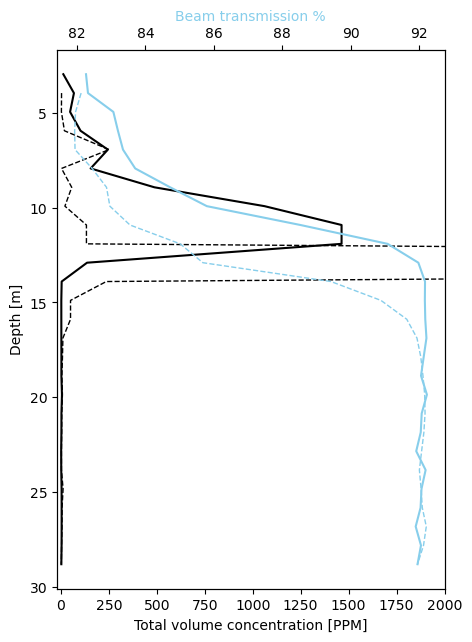

In [55]:
# Create profile comparison plot with yyaxis
fig, ax1 = plt.subplots(figsize=(5,7))
ax2 = ax1.twiny()
ax1.plot(volume_concentration[:26], depth[:26], "--", c="black", lw=1)
ax1.plot(volume_concentration[25:], depth[25:], c="black")
ax1.invert_yaxis()
ax1.set_xlim([-20, 2000])
ax1.set_xlabel("Total volume concentration [PPM]")
ax1.set_ylabel("Depth [m]")
ax2.plot(beam_transmission[:26], depth[:26], "--", c="skyblue", lw=1)
ax2.plot(beam_transmission[25:], depth[25:], c="skyblue")
ax2.set_xlabel("Beam transmission %", color="skyblue")
fig.show()



In [ ]:
# Define plotting function to make similar
# figures given axes and 3 data arrays
def plot_prtsz_comparison(ax1, volume_concentration,
                          beam_transmission, depth):
    midpt = int(len(beam_transmission)/2)
    ax2 = ax1.twiny()
    ax1.plot(volume_concentration[:midpt], depth[:midpt], c="black")
    ax1.plot(volume_concentration[midpt-1:], depth[midpt-1:], "--", c="black", lw=1)
    ax1.invert_yaxis()
    ax1.set_xlabel("Total volume concentration [PPM]")
    ax1.set_ylabel("Depth [m]")
    ax2.plot(beam_transmission[:midpt], depth[:midpt], c="skyblue")
    ax2.plot(beam_transmission[midpt-1:], depth[midpt-1:], "--", c="skyblue", lw=1)
    ax2.set_xlabel("Beam transmission %", color="skyblue")
    return 

#### Plot 6 casts with PRTSZ and transmissometer data

In [7]:
# Define file names
cs1_prtsz_file = "AR82b_cast008_CS1_rs.csv"
cn_prtsz_file = "AR82b_cast009_CN_rs.csv"
cs2_prtsz_file = "AR82b_cast010_CS2_rs.csv"
cs3_prtsz_file = "AR82b_cast011_CS3_rs.csv"
ea_prtsz_file = "AR82b_cast012_EA_rs.csv"
cs4_prtsz_file = "AR82b_cast013_CS4_rs.csv"

cs1_cast_file = "ar82b_008.asc"
cn_cast_file = "ar82b_009.asc"
cs2_cast_file = "ar82b_010.asc"
cs3_cast_file = "ar82b_011.asc"
ea_cast_file = "ar82b_012.asc"
cs4_cast_file = "ar82b_013.asc"


In [33]:
# Load data sets
cs1_volume_concentration = load_prtsz_volume_concentration(cs1_prtsz_file)
cast008, cs1_beam_transmission, cs1_depth = load_ctd_beam_transmission(cs1_cast_file)

cn_volume_concentration = load_prtsz_volume_concentration(cn_prtsz_file)
cast009, cn_beam_transmission, cn_depth = load_ctd_beam_transmission(cn_cast_file)

cs2_volume_concentration = load_prtsz_volume_concentration(cs2_prtsz_file)
cast010, cs2_beam_transmission, cs2_depth = load_ctd_beam_transmission(cs2_cast_file)

cs3_volume_concentration = load_prtsz_volume_concentration(cs3_prtsz_file)
cast011, cs3_beam_transmission, cs3_depth = load_ctd_beam_transmission(cs3_cast_file)

ea_volume_concentration = load_prtsz_volume_concentration(ea_prtsz_file)
cast012, ea_beam_transmission, ea_depth = load_ctd_beam_transmission(ea_cast_file)

cs4_volume_concentration = load_prtsz_volume_concentration(cs4_prtsz_file)
cast013, cs4_beam_transmission, cs4_depth = load_ctd_beam_transmission(cs4_cast_file)

In [34]:
# Get PRTSZ data recorded at same times as
# transmissometer data
cs1_volume_concentration = cs1_volume_concentration.sel(
    time=cs1_beam_transmission.time, method="nearest"
)
cn_volume_concentration = cn_volume_concentration.sel(
    time=cn_beam_transmission.time, method="nearest"
)
cs2_volume_concentration = cs2_volume_concentration.sel(
    time=cs2_beam_transmission.time, method="nearest"
)
cs3_volume_concentration = cs3_volume_concentration.sel(
    time=cs3_beam_transmission.time, method="nearest"
)
ea_volume_concentration = ea_volume_concentration.sel(
    time=ea_beam_transmission.time, method="nearest"
)
cs4_volume_concentration = cs4_volume_concentration.sel(
    time=cs4_beam_transmission.time, method="nearest"
)

C:\Users\kylene.cooley\AppData\Local\Temp\ipykernel_21144\2581933018.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


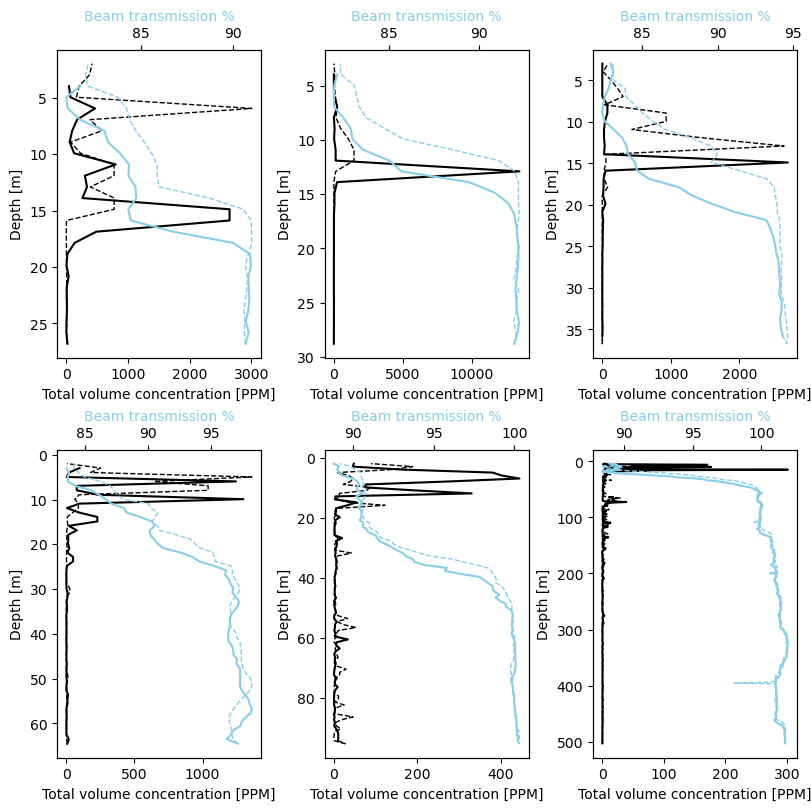

In [36]:
# Plot 2x3 subplot figure with comparison
# profiles for each cast
fig, axs = plt.subplots(2, 3, figsize=(8,8), layout="constrained")
plot_prtsz_comparison(axs[0][0],cs1_volume_concentration, cs1_beam_transmission, cs1_depth)
plot_prtsz_comparison(axs[0][1], cn_volume_concentration, cn_beam_transmission, cn_depth)
plot_prtsz_comparison(axs[0][2], cs2_volume_concentration, cs2_beam_transmission, cs2_depth)
plot_prtsz_comparison(axs[1][0], cs3_volume_concentration, cs3_beam_transmission, cs3_depth)
plot_prtsz_comparison(axs[1][1], ea_volume_concentration, ea_beam_transmission, ea_depth)
plot_prtsz_comparison(axs[1][2], cs4_volume_concentration, cs4_beam_transmission, cs4_depth)
fig.show()

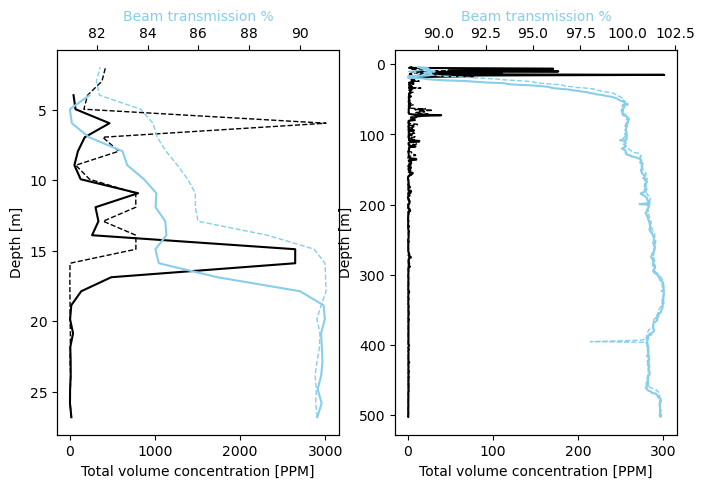

In [37]:
# Check what is going on w/ casts 008 and 013
fig, axs = plt.subplots(1, 2, figsize=(8,5))
plot_prtsz_comparison(axs[0],cs1_volume_concentration, cs1_beam_transmission, cs1_depth)
plot_prtsz_comparison(axs[1], cs4_volume_concentration, cs4_beam_transmission, cs4_depth)

In [35]:
# fig, axs = plt.subplots(2, 1)

cs1_volume_concentration

<xarray.DataArray 'total_volume_concentration' (time: 49)>
array([4.5581100e+01, 6.8700200e+01, 4.6735300e+02, 1.7714480e+02,
       9.6842300e+01, 5.5683700e+01, 1.2922770e+02, 8.0292640e+02,
       3.0282670e+02, 3.3767920e+02, 2.6302900e+02, 2.6455872e+03,
       2.6455872e+03, 4.8782660e+02, 1.3596890e+02, 1.9301700e+01,
       5.1081000e+00, 3.9946000e+01, 7.3701000e+00, 1.1879200e+01,
       1.1879200e+01, 5.4253000e+00, 3.6636000e+00, 2.0243700e+01,
       4.7944000e+00, 8.0212000e+00, 1.2584800e+01, 3.8115000e+00,
       8.3071000e+00, 8.3071000e+00, 5.4163000e+00, 4.7944000e+00,
       3.0743000e+00, 2.1665000e+00, 4.6855000e+00, 7.7700920e+02,
       7.7700920e+02, 3.9248820e+02, 7.7576820e+02, 7.7576820e+02,
       2.3303380e+02, 7.1572300e+01, 5.7661140e+02, 3.8767850e+02,
       3.0073340e+03, 1.6659080e+02, 2.1008600e+02, 3.7851640e+02,
       4.2115070e+02])
Coordinates:
  * time     (time) datetime64[ns] 2024-04-18T12:56:37 ... 2024-04-18T12:59:15

#### Attempt contour plot of cross shelf survey

In [48]:
# Create dataset for each station with same dimension and variable names
midpt = int(len(cs1_beam_transmission)/2)
cs1_ds = xr.Dataset(data_vars={
        "volume_concentration": ("depth", cs1_volume_concentration.data[:midpt]),
        "beam_transmission": ("depth", cs1_beam_transmission.data[:midpt])
    },
    coords=dict(depth=("depth", cs1_depth.data[:midpt]))
    )

In [72]:
# Define function for creating station datasets
def make_station_ds(volume_concentration, beam_transmission, depth, order):
    midpt = int(len(beam_transmission)/2)
    station_ds = xr.Dataset(data_vars={
        "volume_concentration": ("depth", volume_concentration.data[:midpt]),
        "beam_transmission": ("depth", beam_transmission.data[:midpt])
    },
    coords=dict(order=order,
                depth=("depth", depth.data[:midpt]))
    )
    return station_ds.expand_dims(dim="order")

In [73]:
# Create station datasets for all 6 casts
cs1_ds = make_station_ds(cs1_volume_concentration, cs1_beam_transmission, cs1_depth, 1)
cn_ds = make_station_ds(cn_volume_concentration, cn_beam_transmission, cn_depth, 2)
cs2_ds = make_station_ds(cs2_volume_concentration, cs2_beam_transmission, cs2_depth, 3)
cs3_ds = make_station_ds(cs3_volume_concentration, cs3_beam_transmission, cs3_depth, 4)
ea_ds = make_station_ds(ea_volume_concentration, ea_beam_transmission, ea_depth, 5)
cs4_ds = make_station_ds(cs4_volume_concentration, cs4_beam_transmission, cs4_depth, 6)

In [75]:
cs4_ds

<xarray.Dataset>
Dimensions:               (order: 1, depth: 504)
Coordinates:
  * order                 (order) int32 6
  * depth                 (depth) float64 3.971 4.963 5.956 ... 501.7 502.7
Data variables:
    volume_concentration  (order, depth) float64 4.059 1.367 ... 0.487 0.4449
    beam_transmission     (order, depth) float64 88.92 89.36 ... 101.8 101.7

In [77]:
# Attempt to combine datasets
combined_ds = xr.combine_nested([cs1_ds, cn_ds, cs2_ds, cs3_ds, ea_ds, cs4_ds],
                                concat_dim=["order"])
combined_ds

<xarray.Dataset>
Dimensions:               (depth: 506, order: 6)
Coordinates:
  * depth                 (depth) float64 1.985 2.978 3.971 ... 501.7 502.7
  * order                 (order) int32 1 2 3 4 5 6
Data variables:
    volume_concentration  (order, depth) float64 nan nan 45.58 ... 0.487 0.4449
    beam_transmission     (order, depth) float64 nan nan 81.7 ... 101.8 101.7

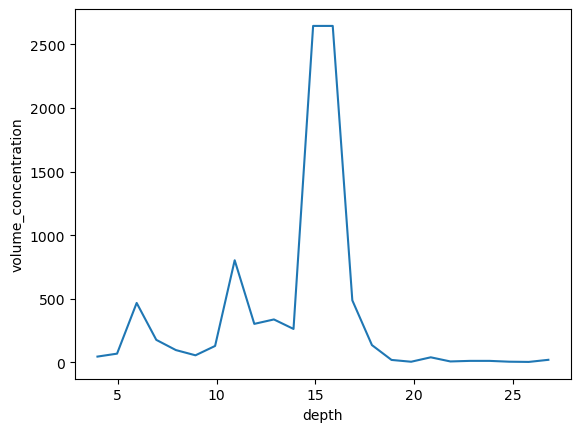

In [50]:
cs1_ds.volume_concentration.plot()

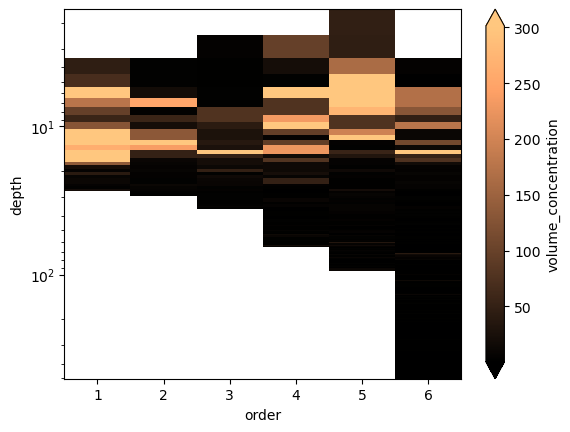

In [89]:
# Plot filled contour from combined data array
fig, ax = plt.subplots()
combined_ds.volume_concentration.plot.pcolormesh(
    x="order", y="depth", ax=ax, yscale="log",
    robust=True, cmap="copper")
ax.invert_yaxis()

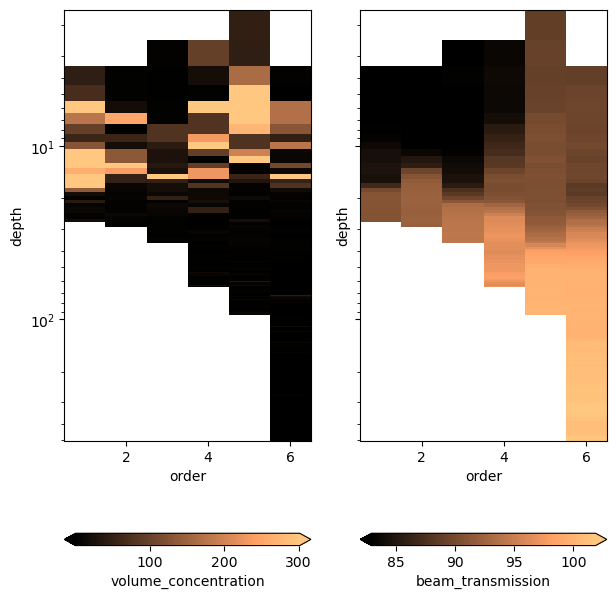

In [102]:
# Plot filled contour from combined data array
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(7,8))
combined_ds.volume_concentration.plot.pcolormesh(
    x="order", y="depth", ax=ax[0], yscale="log",
    robust=True, cmap="copper", cbar_kwargs=dict(location="bottom"))
combined_ds.beam_transmission.plot.pcolormesh(
    x="order", y="depth", ax=ax[1], yscale="log",
    robust=True, cmap="copper", cbar_kwargs=dict(location="bottom"))
ax[0].invert_yaxis()
# ax[1].set_ylabel("")
# ax[1].invert_yaxis()